<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

_Author: Unknown_

------

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [145]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [146]:
cali_df = pd.DataFrame(X,columns=cali.feature_names)
cali_df['price'] = y

In [147]:
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [148]:
cali_df.shape

(20640, 9)

In [149]:
cali_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [150]:
cali_df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
price         float64
dtype: object

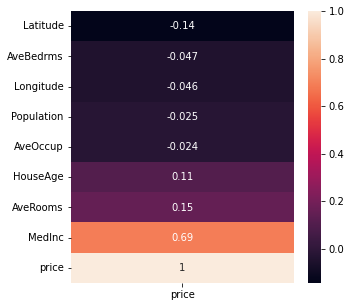

In [151]:
plt.figure(figsize=(5,5))
sns.heatmap(cali_df.corr()[['price']].sort_values(by='price'),annot=True)
plt.yticks(rotation=0);

### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [152]:
X_train,X_test,y_train,y_test = train_test_split(cali_df[['MedInc', 'HouseAge', 'AveRooms']],
                                                 cali_df['price'],random_state=42)

# using 3 highest correlated features for X , and price feature for y

In [153]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15480, 3), (5160, 3), (15480,), (5160,))

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [154]:
# Instantiate

model = Sequential()


# input layer
model.add(Dense(24,activation='relu',input_shape=(3,))) # number of features is 3

# hidden layer
model.add(Dense(12, activation='relu'))

# output layer
model.add(Dense(1,activation=None))



Set up the compilation of the network.  Use an `adam` optimizer and appropriate loss function with the mean squared error metric.

In [155]:
model.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])

In [156]:
X_train.shape

(15480, 3)

In [157]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 24)                96        
                                                                 
 dense_32 (Dense)            (None, 12)                300       
                                                                 
 dense_33 (Dense)            (None, 1)                 13        
                                                                 
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [158]:
history = model.fit(X_train,y_train,epochs=100,verbose=0,validation_data=(X_test,y_test))

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

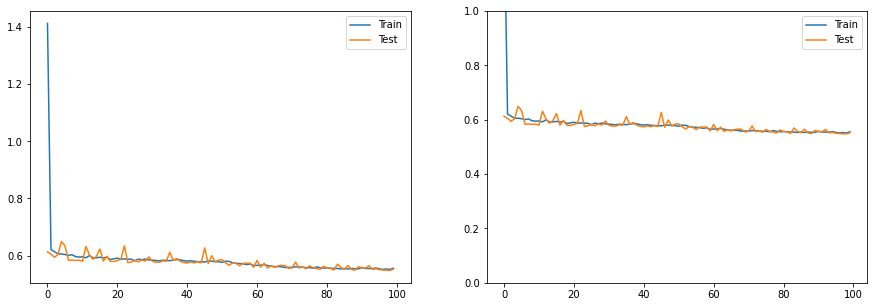

In [168]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(history.history['loss'],label='Train')
ax[0].plot(history.history['val_loss'],label='Test')
ax[0].legend()


ax[1].plot(history.history['mean_squared_error'],label='Train')
ax[1].plot(history.history['val_mean_squared_error'],label='Test')
ax[1].legend()
plt.ylim(0,1);

In [169]:
model.evaluate(X_test,y_test,verbose=1)

162/162 [==============================] - 0s 1ms/step - loss: 0.5521 - mean_squared_error: 0.5521


[0.5521030426025391, 0.5521030426025391]

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `ReLU` activation function.

In [170]:
X_train,X_test,y_train,y_test = train_test_split(cali_df.drop(columns='price'),
                                                 cali_df['price'],random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [171]:
# Instantiate

model = Sequential()


# input layer
model.add(Dense(24,activation='relu',input_shape=(8,))) # number of features is 3

# hidden layer
model.add(Dense(64 , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64 , activation='relu'))


# output layer
model.add(Dense(1,activation=None))



In [172]:
model.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])

In [173]:
history = model.fit(X_train,y_train,epochs=100,verbose=0,validation_data=(X_test,y_test))

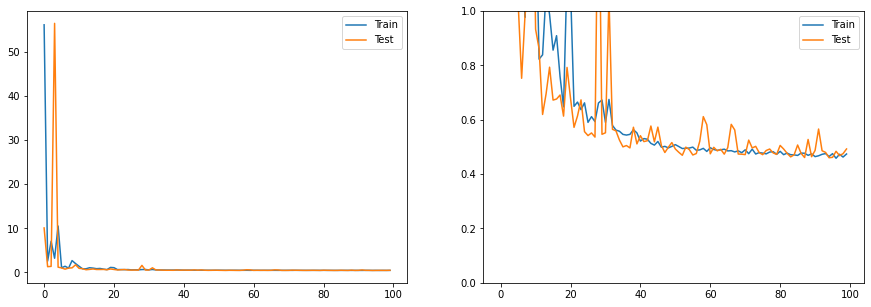

In [174]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(history.history['loss'],label='Train')
ax[0].plot(history.history['val_loss'],label='Test')
ax[0].legend()

ax[1].plot(history.history['mean_squared_error'],label='Train')
ax[1].plot(history.history['val_mean_squared_error'],label='Test')
ax[1].legend()
plt.ylim(0,1);

In [175]:
model.evaluate(X_test,y_test,verbose=1)

162/162 [==============================] - 0s 1ms/step - loss: 0.4924 - mean_squared_error: 0.4924


[0.492398202419281, 0.492398202419281]

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

In [176]:
# Instantiate

model = Sequential()

# Batchnormalize layer
model.add(BatchNormalization())


# input layer
model.add(Dense(24,activation='relu',input_shape=(8,))) # number of features is 3

# hidden layer
model.add(Dense(64 , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64 , activation='relu'))


# output layer
model.add(Dense(1,activation=None))



In [177]:
model.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])

In [178]:
history = model.fit(X_train,y_train,epochs=100,verbose=0,validation_data=(X_test,y_test))

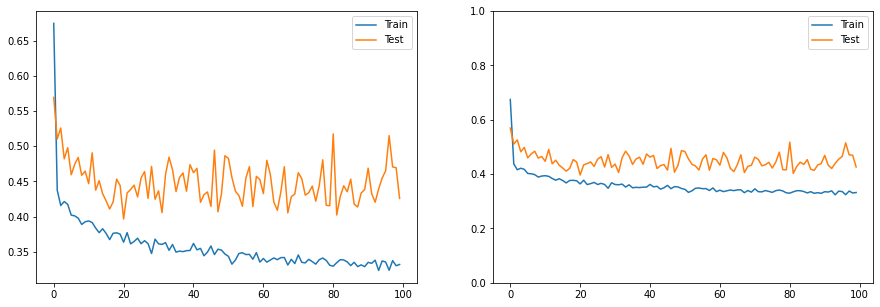

In [179]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(history.history['loss'],label='Train')
ax[0].plot(history.history['val_loss'],label='Test')
ax[0].legend()

ax[1].plot(history.history['mean_squared_error'],label='Train')
ax[1].plot(history.history['val_mean_squared_error'],label='Test')
ax[1].legend()
plt.ylim(0,1);

In [180]:
model.evaluate(X_test,y_test,verbose=1)

162/162 [==============================] - 0s 1ms/step - loss: 0.4260 - mean_squared_error: 0.4260


[0.42598456144332886, 0.42598456144332886]

##### Does this change anything?

In [ ]:
# The loss function minize a bit more than the prior step

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [188]:
es = EarlyStopping(patience = 5)

In [189]:
# Instantiate

model = Sequential()

# Batchnormalize layer
model.add(BatchNormalization())


# input layer
model.add(Dense(24,activation='relu',input_shape=(8,)))

# hidden layer
model.add(Dense(64 , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64 , activation='relu'))

# output layer
model.add(Dense(1,activation=None))



In [190]:
model.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])

In [191]:
history = model.fit(X_train,y_train,epochs=100,verbose=0,validation_data=(X_test,y_test),callbacks=[es])

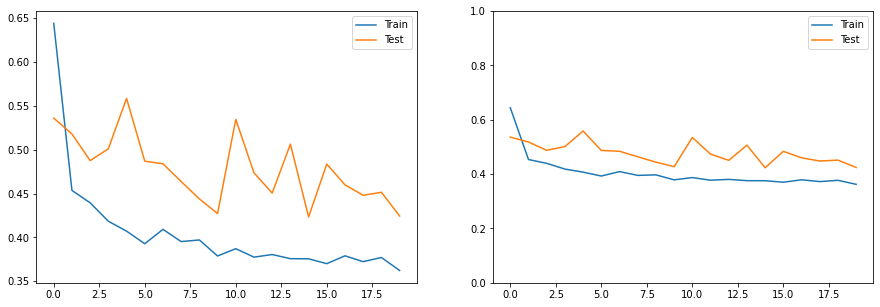

In [192]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(history.history['loss'],label='Train')
ax[0].plot(history.history['val_loss'],label='Test')
ax[0].legend()

ax[1].plot(history.history['mean_squared_error'],label='Train')
ax[1].plot(history.history['val_mean_squared_error'],label='Test')
ax[1].legend()
plt.ylim(0,1);

# the number of epoch lower from 100 -> 18

In [193]:
model.evaluate(X_test,y_test,verbose=1)

162/162 [==============================] - 0s 1ms/step - loss: 0.4244 - mean_squared_error: 0.4244


[0.42439499497413635, 0.42439499497413635]

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [209]:
# Instantiate

model = Sequential()

# Batchnormalize layer
model.add(BatchNormalization())


# input layer
model.add(Dense(24,activation='relu',input_shape=(8,)))

# hidden layer
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.05))


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(64 , activation='relu'))

# output layer
model.add(Dense(1,activation=None))



In [210]:
model.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])

In [211]:
history = model.fit(X_train,y_train,epochs=100,verbose=0,validation_data=(X_test,y_test),callbacks=[es])

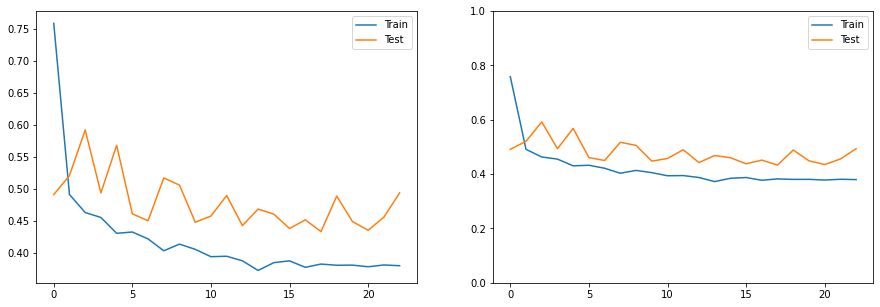

In [212]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(history.history['loss'],label='Train')
ax[0].plot(history.history['val_loss'],label='Test')
ax[0].legend()

ax[1].plot(history.history['mean_squared_error'],label='Train')
ax[1].plot(history.history['val_mean_squared_error'],label='Test')
ax[1].legend()
plt.ylim(0,1);

In [213]:
model.evaluate(X_test,y_test,verbose=1)
# Dropout didn't help that much

162/162 [==============================] - 0s 1ms/step - loss: 0.4934 - mean_squared_error: 0.4934


[0.49344658851623535, 0.49344658851623535]

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [218]:
# RMSE - Baseline score

dummy = DummyRegressor()
dummy.fit(X_train,y_train)

dummy_pred = dummy.predict(X_test)
metrics.mean_squared_error(y_test,dummy_pred,squared=False)


1.1503344789953083

In [219]:
# RMSE
model_pred = model.predict(X_test)
metrics.mean_squared_error(y_test,model_pred,squared=False)
# This model can beat the base line

162/162 [==============================] - 0s 1ms/step


0.7024576089408068

### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [222]:
# Instantiate

model = Sequential()

# Batchnormalize layer
model.add(BatchNormalization())


# input layer
model.add(Dense(24,activation='relu',input_shape=(8,),kernel_regularizer=l2()))

# hidden layer
model.add(Dense(64 , activation='relu',kernel_regularizer=l2()))
model.add(Dropout(0.05))


model.add(Dense(128, activation='relu',kernel_regularizer=l2()))
model.add(Dropout(0.2))


model.add(Dense(64 , activation='relu',kernel_regularizer=l2()))

# output layer
model.add(Dense(1,activation=None))



In [223]:
model.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])

In [224]:
history = model.fit(X_train,y_train,epochs=100,verbose=0,validation_data=(X_test,y_test),callbacks=[es])

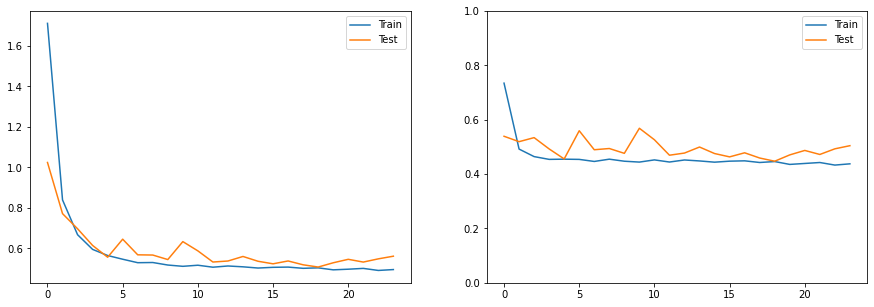

In [225]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(history.history['loss'],label='Train')
ax[0].plot(history.history['val_loss'],label='Test')
ax[0].legend()

ax[1].plot(history.history['mean_squared_error'],label='Train')
ax[1].plot(history.history['val_mean_squared_error'],label='Test')
ax[1].legend()
plt.ylim(0,1);

In [226]:
model.evaluate(X_test,y_test,verbose=1)


162/162 [==============================] - 0s 1ms/step - loss: 0.5612 - mean_squared_error: 0.5045


[0.5611864924430847, 0.5044772624969482]

In [227]:
# RMSE
model_pred = model.predict(X_test)
metrics.mean_squared_error(y_test,model_pred,squared=False)
# Overfitting seem better, but the RMSE rise up a bit.

162/162 [==============================] - 0s 968us/step


0.7102656677851112

### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [228]:
model.save('cali_housing.h5')